# 🌍 WHO Global Health Data Analysis

## 📌 Introduction
This project analyzes global health data from the World Health Organization (WHO) to explore patterns, trends, and disparities in health indicators across countries. The purpose is to extract meaningful insights from real-world health data using data analytics techniques.

This project demonstrates a full data analysis workflow including:
- Data loading
- Cleaning
- Exploration
- Visualization
- Insight generation
- Interpretation

## 🎯 Project Objectives

- Understand the structure and contents of the WHO dataset  
- Clean and preprocess real-world health data  
- Explore key health indicators  
- Identify global patterns and disparities  
- Visualize trends and distributions  
- Extract meaningful insights  
- Practice real-world data analytics workflow  

## ❓ Analytical Questions

This analysis aims to answer questions such as:

- How do health indicators vary across countries?
- Which indicators show the greatest disparities?
- What patterns exist in mortality and development indicators?
- Are there correlations between health outcomes and development factors?
- Which regions/countries face the highest health risks?

In [34]:
import pandas as pd
import seaborn as sns

## Data Understanding & Cleaning 

#Loading dataset
df = pd.read_csv('project/suicidestats.csv')


In [35]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


## 📂 Dataset Overview

This dataset contains country-level health indicators provided by the World Health Organization (WHO).  
It includes health, demographic, mortality, and development-related variables.

Understanding the structure of the dataset is essential before cleaning and analysis.

In [36]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


## 🧹 Data Cleaning

Real-world datasets often contain:
- Missing values
- Inconsistent formats
- Duplicate entries
- Irrelevant columns

This section focuses on preparing the dataset for analysis.

In [37]:
#checking for missing / nan values
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [38]:
df = df.sort_values(['country', 'year'])


Sorting the dataset for consistent time-series analysis
Before performing interpolation or any time-based operations, the dataset was sorted by country and year.
This ensures that each country’s records are arranged in chronological order, allowing accurate interpolation of population values and consistent trend analysis over time.

Proper sorting is essential for maintaining data integrity, especially when working with time-series data across multiple countries.

In [39]:
df['suicides_no'] = df.groupby('country')['suicides_no'].transform(lambda x: x.fillna(x.mean()))
df['population'] = df.groupby('country')['population'].transform(lambda x: x.interpolate())



Filling missing values for suicides and population

Missing values in the suicides_no column were filled using the mean suicide count for each country, assuming that suicide patterns within a country remain relatively stable over time.

Missing values in the population column were handled using linear interpolation within each country, which estimates missing values based on nearby years.

This approach maintains realistic population trends and ensures that missing data does not bias the overall analysis.

In [40]:
df['population'] = df.groupby('country')['population'].transform(lambda x: x.interpolate().bfill().ffill())
df = df.dropna(subset=['population'])



Post-interpolation handling
After applying interpolation, some NaN values may remain at the start or end of each country's data range, as interpolation can only estimate values between known points.
To address this, missing edge values were filled using forward and backward filling methods (ffill and bfill), ensuring continuity in population data.

If a country lacked any valid population records, those rows were excluded from further analysis.

In [41]:
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [42]:
# checking for duplicates
df.duplicated().sum()

0

In [43]:
df.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [44]:
df['year'] = df['year'].astype(int)
df['country'] = df['country'].astype(str)
df['suicides_no'] = df['suicides_no'].astype(int)


year was converted to integer, since it represents whole years.

country was converted to string, as it’s a text-based categorical variable.

suicides_no was converted to integer, because the number of suicides must be a whole number.

In [45]:
# Checking for inconsistent data ( inconsistent data detection)

#negative or zero values
df[df['suicides_no'] < 0]
df[df['population']<= 0]

#Suicides greater than population?
df[df['suicides_no']>df['population']]

#checking invalid year data range
df_invalid_years = df[(df['year'] < 1979) | (df['year'] > 2016)]


df_invalid_years

#Double-Checking the year data

print(df['year'].min(), df['year'].max())

1979 2016


Checking for inconsistent data
In this step, I checked the dataset for possible inconsistencies or logical errors that could affect analysis:

Negative or zero values: Suicide counts and population values cannot be negative or zero.

Suicides greater than population: This is impossible and indicates data entry or reporting errors.

Invalid year range: The valid year range for this dataset is 1979–2016. Any value outside this range is inconsistent.

These checks help ensure data accuracy and reliability before moving forward with analysis.

In this step i have taken out summary statistics for numeric columns

this will help me in future for outliers or nan values or basic calculation to understand 

Visualizing categorical column distributions
I plotted bar charts for the sex and age columns to see how the data is distributed across different categories.

The sex distribution chart shows how many records belong to each gender.

The age distribution chart (in orange) shows the number of records for each age group.

These visualizations help understand data balance and identify if any categories are over- or under-represented.

## Feature Engineering

In [46]:
#Getting the Suicide rates per 100k population
df['suicides_per_100k'] = (df['suicides_no'] / df['population']) * 100000


Calculating suicide rates per 100k population
To make comparisons between countries and years fair, I calculated the suicide rate per 100,000 people using the formula:

Suicides per 100k
=
suicides_no
population
×
100000
Suicides per 100k=
population
suicides_no
	​

×100000

This standardizes the data and allows meaningful analysis across countries with different population sizes.

## Handline Outliers using IQR method 

In [47]:
#Checking for outliers

Q1 = df['suicides_per_100k'].quantile(0.25)
Q3 = df['suicides_per_100k'].quantile(0.75)

IQR = Q3-Q1


outliers = df[(df['suicides_per_100k'] < (Q1 - 1.5 * IQR)) | 
              (df['suicides_per_100k'] > (Q3 + 1.5 * IQR))]
print(outliers[['country', 'year', 'suicides_per_100k', ]].head(10))

        country  year  suicides_per_100k
1067  Argentina  1979          46.464646
1079  Argentina  1980          51.873199
1091  Argentina  1981          53.611557
1103  Argentina  1982          49.147727
1115  Argentina  1983          43.417367
1127  Argentina  1984          49.230769
1139  Argentina  1985          55.647383
1151  Argentina  1986          63.013699
1163  Argentina  1987          54.083288
1175  Argentina  1988          55.102041


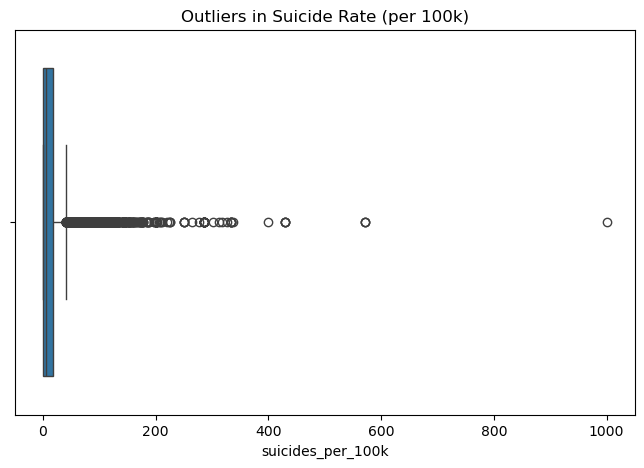

In [48]:
#Outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x=df['suicides_per_100k'])
plt.title('Outliers in Suicide Rate (per 100k)')
plt.show()




Visualizing outliers in suicide rates
To identify extreme values in the suicide rate data, I used a boxplot for the suicides_per_100k column.
The boxplot displays the spread and distribution of the data:

The box represents the interquartile range (IQR) — the middle 50% of the data.

The line inside the box is the median.

Points outside the whiskers indicate potential outliers.

Detecting outliers helps identify countries or years with unusually high or low suicide rates, which may represent either genuine social phenomena or data irregularities.

In [49]:
#Checking % of outliers
len(outliers) / len(df) * 100


7.680963807238553

In [50]:
#Removing Outliers
df = df[(df['suicides_per_100k'] >= 0) & (df['suicides_per_100k'] <= 150)]


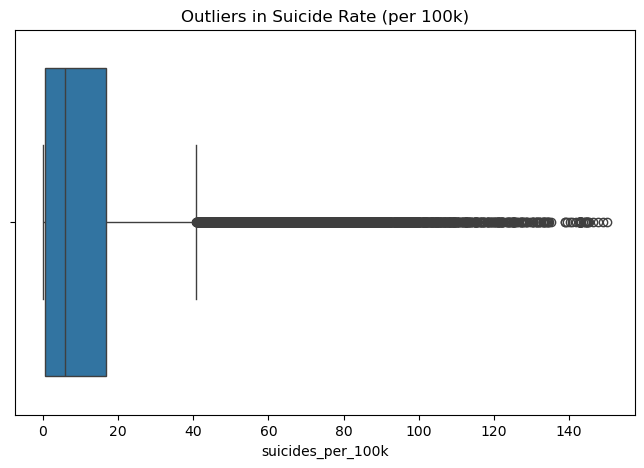

In [51]:
#Outliers using boxplot

plt.figure(figsize=(8,5))
sns.boxplot(x=df['suicides_per_100k'])
plt.title('Outliers in Suicide Rate (per 100k)')
plt.show()




Filtering extreme suicide rate values
To ensure non-biased results and reduce the impact of unrealistic data points, I removed extreme outliers in the suicides_per_100k column.

Records with suicide rates below 0 or above 150 per 100,000 population were excluded, as such values are unlikely to represent real-world data and could distort the overall analysis.

This step improves data reliability and ensures that trends and averages reflect realistic conditions across countries and years.

## 📊 Data Visualization

Visualizations help communicate patterns and insights clearly for analysis

In [52]:
import matplotlib.pyplot as plt

## visualization using categorical columns

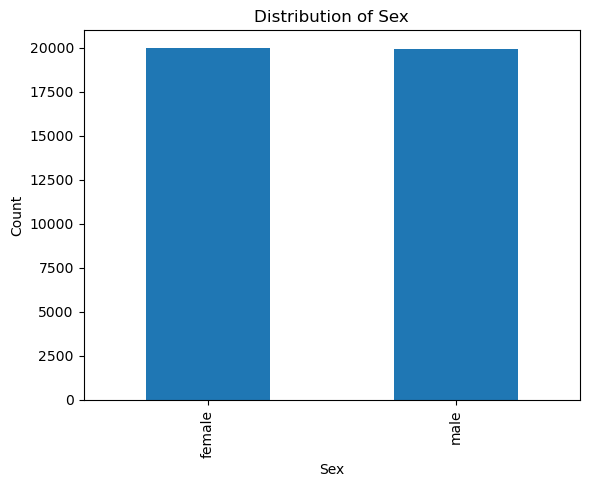

<function matplotlib.pyplot.show(close=None, block=None)>

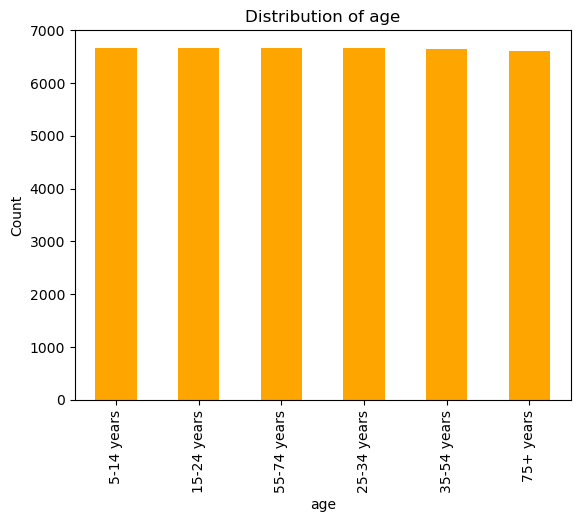

In [53]:

df['sex'].value_counts().plot(kind='bar')

plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


df['age'].value_counts().plot(kind='bar', color='orange')

plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Count')
plt.show



## Global Trend Analysis


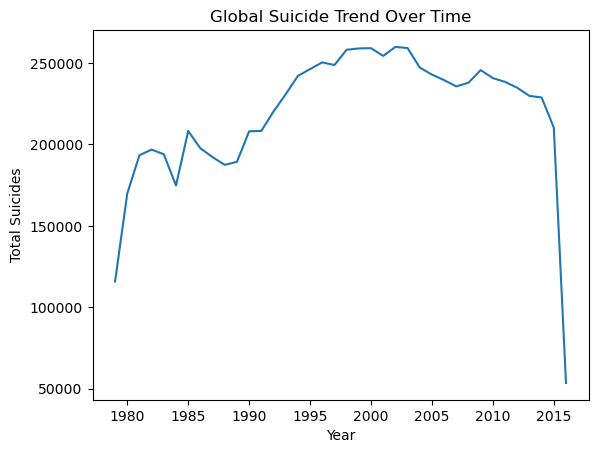

In [54]:
global_trend = df.groupby('year')['suicides_no'].sum().reset_index()

plt.figure()
sns.lineplot(data=global_trend, x='year', y='suicides_no')
plt.title("Global Suicide Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.show()

## Country-Level Risk (Per Capita)

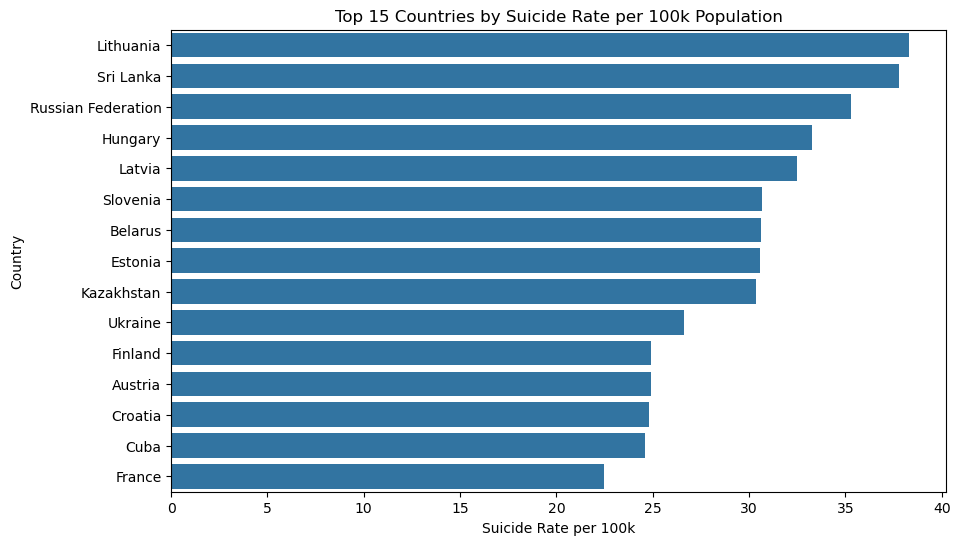

In [55]:
country_rates = df.groupby('country')['suicides_per_100k'].mean().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_rates, x='suicides_per_100k', y='country')
plt.title("Top 15 Countries by Suicide Rate per 100k Population")
plt.xlabel("Suicide Rate per 100k")
plt.ylabel("Country")
plt.show()

## Exploratory Data Analysis (EDA)


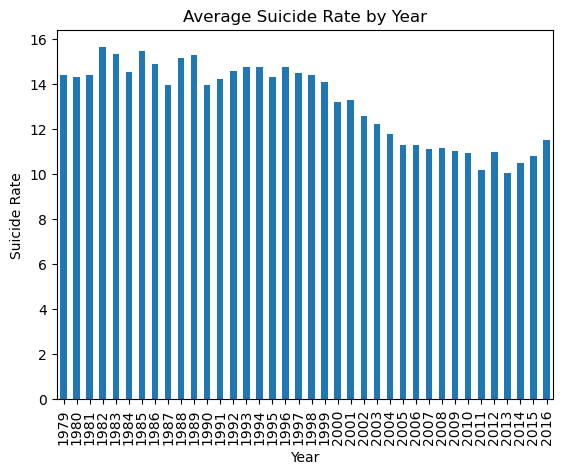

In [56]:
df.groupby('year')['suicides_per_100k'].mean().plot(kind='bar')
plt.title('Average Suicide Rate by Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.show()




# 📊 Average Suicide Rate Analysis

Below are the visualizations showing the **average suicide rate per 100,000 population** by year and by country.  
Using suicide rates (rather than raw counts) allows for fair comparison across countries and years.

---







In [57]:
df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k'],
      dtype='object')

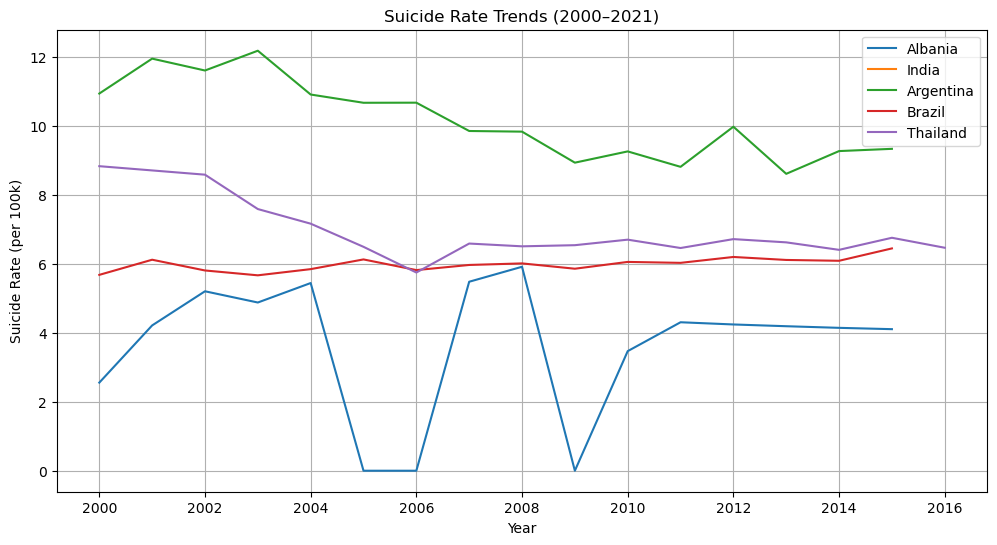

In [58]:
# Simple trend plot for selected countries

selected_countries = ['Albania', 'India', 'Argentina', 'Brazil', 'Thailand']

df_filtered = df[(df['year'] >= 2000) & (df['year'] <= 2021)]

plt.figure(figsize=(12, 6))

for country in selected_countries:
    yearly_rate = (
        df_filtered[df_filtered['country'] == country]
        .groupby('year')['suicides_per_100k']
        .mean()
    )
    plt.plot(yearly_rate.index, yearly_rate, label=country)

plt.title('Suicide Rate Trends (2000–2021)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k)')
plt.legend()
plt.grid(True)
plt.show()


# 📉 Suicide Rate Trends Over Time (2000–2021)

The chart below shows how the suicide rate (per 100,000 population) has changed from **2000 to 2021** for a selection of countries.  
This allows us to compare long-term trends across different regions

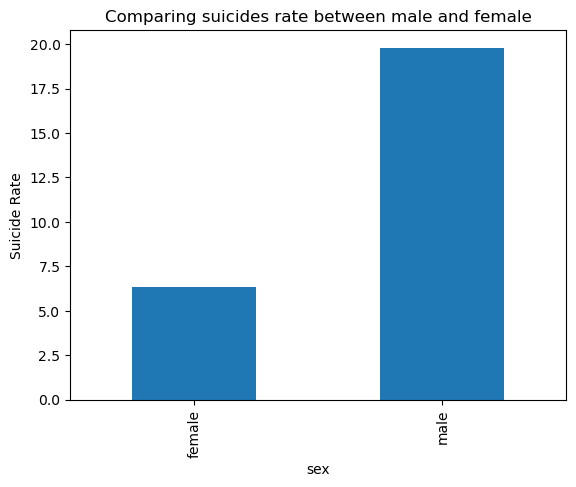

In [59]:
df.groupby('sex')['suicides_per_100k'].mean().plot(kind='bar')
plt.title('Comparing suicides rate between male and female')
plt.xlabel('sex')
plt.ylabel('Suicide Rate')
plt.show()


## male vs female Suicide Rate Comparison by Sex

The following chart compares the **average suicide rate per 100,000 population** between males and females.  
This helps highlight gender differences in suicide risk.

# Interpretation

The results show that males have a significantly higher suicide rate than females.
This gap is substantial in most countries, indicating that men face a much higher risk of suicide.
Factors contributing to this difference often include:

social expectations and stigma around seeking help

higher exposure to certain stressors

more lethal methods typically used by males

Understanding this difference is crucial for designing targeted mental-health interventions and prevention strategies.

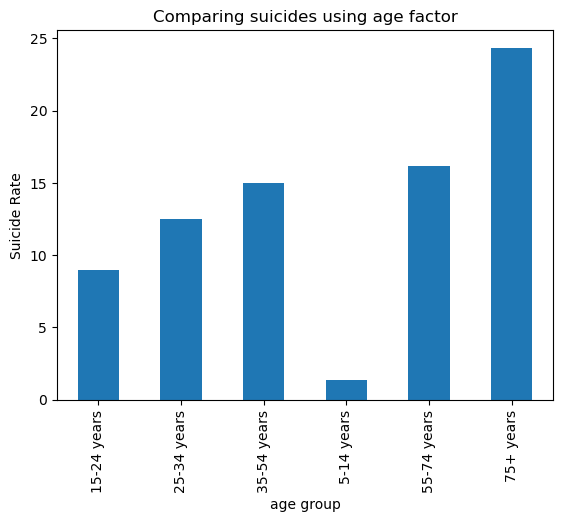

In [60]:
df.groupby('age')['suicides_per_100k'].mean().plot(kind='bar')
plt.title('Comparing suicides using age factor')
plt.xlabel('age group')
plt.ylabel('Suicide Rate')
plt.show()


## 📊 Suicide Rate by Age Group

The chart below shows the **average suicide rate per 100,000 population** across different age groups. This comparison helps identify which age categories are most at risk.



# Interpretation

The results reveal a clear pattern across age groups:

5–14 years:
Suicide rates are very low in this group, indicating minimal occurrence among children.

18–24 years:
Suicide rates start to increase noticeably in young adulthood.
This age range often faces pressure related to education, careers, identity, and life transitions.

75+ years:
Suicide rates are the highest in this group.
Contributing factors may include loneliness, chronic illness, loss of partners, or reduced social support.

Overall, the data suggests that older adults (75+) are at the greatest risk, while children (5–14) experience the lowest suicide rates. Recognizing these differences helps guide age-specific mental health policies and prevention strategies.